# Análises Além Tutorial

## Balanceamento de dados a partir do mais50k e usando Sexo como atributo sensível
## Classificação utilizando Random Forest e Gradient Boosting a partir de Raça como atributo sensível

<br>

# Carregando Conjunto de Dados

In [1]:
import pandas as pd

data = pd.read_csv('2-dados.csv', delimiter=',')

In [2]:
#quantidade de pessoas que não juntaram mais de 50k (37155) e que juntaram (11687)
print(data['mais50k'].value_counts())

0    37155
1    11687
Name: mais50k, dtype: int64


# Balanceamento de Classes

##  Balanceando mais50k e utilizando o sexo como atributo sensível

## Oversampling

In [3]:
from imblearn.over_sampling import RandomOverSampler

#criando modelo de oversampling
over_sampler = RandomOverSampler(random_state=99)

In [4]:
#realizando reamostragem oversampling, utilizando o mais50k como rótulo para o balanceamento
sex_over_x, sex_over_y = over_sampler.fit_resample(data.drop(['mais50k'], axis=1), data['mais50k'])

In [5]:
#contagem da realização do oversampling
sex_over_y.value_counts()

0    37155
1    37155
Name: mais50k, dtype: int64

In [6]:
#convertendo variáveis categóricas
sex_over_x_dummies = pd.get_dummies(sex_over_x)

In [7]:
#função que executa a classificação justa
def run_classification(classifier, x, y, sensitive_feature):
    demographic_parity = DemographicParity()

    mitigator = ExponentiatedGradient(classifier, demographic_parity)

    #realizando o treino do modelo justo e utilizando o sexo como atributo sensível
    mitigator.fit(x, y, sensitive_features=sensitive_feature)

    #previsão dos dados utilizando o modelo justo
    #y_pred_mitigated = mitigator.predict(x)
    return mitigator.predict(x)

#função que calcula as métricas agrupadas
def calculate_metrics(y_true, y_pred, sensitive_feature):
    #agrupamento de métricas para cálculo com MetricFrame
    metrics = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'false positive rate': false_positive_rate,
        'true positive rate': true_positive_rate,
        'selection rate': selection_rate
    }

    return MetricFrame(
        metrics=metrics,
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=sensitive_feature
    )

In [8]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate, count
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

#criando modelo de árvore de decisão
decision_tree_oversampling = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

In [9]:
sex_over_prev = run_classification(decision_tree_oversampling, sex_over_x_dummies, sex_over_y, sex_over_x['sex'])

a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series a

In [10]:
#calcula métricas para os dados com oversampling
sex_over_results = calculate_metrics(sex_over_y, sex_over_prev, sex_over_x['sex'])

print(sex_over_results.overall)
sex_over_results.by_group

accuracy               0.752887
precision              0.755729
recall                 0.747329
false positive rate    0.241556
true positive rate     0.747329
selection rate         0.494442
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
sex,,,,,,
Female,0.751465,0.53623,0.916127,0.313735,0.916127,0.484603
Male,0.753415,0.835094,0.716671,0.195759,0.716671,0.498099


In [11]:
sex_over_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A83FC7F70>,
      dtype=object)

## Undersampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler

#criando modelo de undersampling
under_sampler = RandomUnderSampler(random_state=99)

In [13]:
#realizando reamostragem undersampling, utilizando o mais50k como rótulo para o balanceamento
sex_under_x, sex_under_y = under_sampler.fit_resample(data.drop(['mais50k'], axis=1), data['mais50k'])

In [14]:
#contagem da realização do undersampling
sex_under_y.value_counts()

0    11687
1    11687
Name: mais50k, dtype: int64

In [15]:
#convertendo variáveis categóricas
sex_under_x_dummies = pd.get_dummies(sex_under_x)

In [16]:
#criação do classificador de árvore de decisão

decision_tree_undersampling = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

In [17]:
#execução do treino e previsão do modelo justo
sex_under_prev = run_classification(decision_tree_undersampling, sex_under_x_dummies, sex_under_y, sex_under_x['sex'])

a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series a

In [18]:
sex_under_results = calculate_metrics(sex_under_y, sex_under_prev, sex_under_x['sex'])

print(sex_under_results.overall)
sex_under_results.by_group

accuracy               0.752674
precision               0.76013
recall                 0.738342
false positive rate    0.232994
true positive rate     0.738342
selection rate         0.485668
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
sex,,,,,,
Female,0.756735,0.542481,0.909553,0.303783,0.909553,0.475625
Male,0.751196,0.837109,0.707804,0.189197,0.707804,0.489322


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A896E91F0>,
      dtype=object)

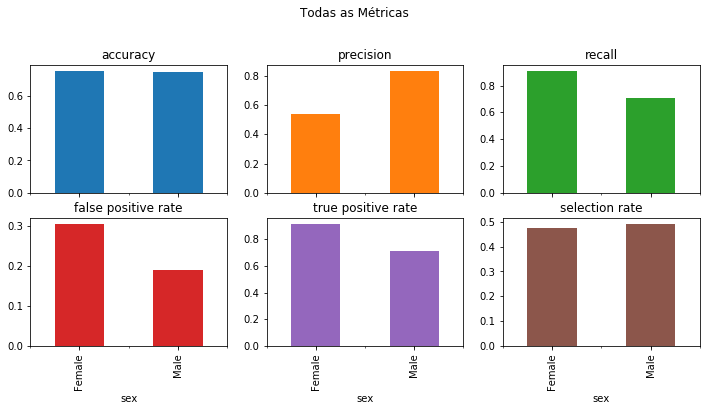

In [19]:
sex_under_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)

# Atributo Sensível: Raça

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

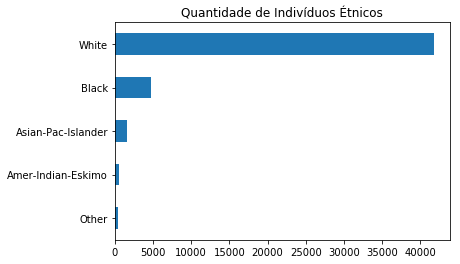

In [20]:
data['race'].value_counts().sort_values().plot(kind='barh', title='Quantidade de Indivíduos Étnicos')

data['race'].value_counts()

In [21]:
#separando os dados para execução do modelo, apenas brancos (41762) e negros (4685)
data_black_white = data[data.race.isin(['Black', 'White'])]
data_black_white['race'].value_counts()

White    41762
Black     4685
Name: race, dtype: int64

In [22]:
race_x = data_black_white.drop(['mais50k'], axis=1)
race_x_dummies = pd.get_dummies(race_x)

race_y = data_black_white['mais50k']

In [23]:
#criando modelo de previsão
race_decision_tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

race_decision_tree_prev = run_classification(race_decision_tree, race_x_dummies, race_y, race_x['race'])

a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series a

In [24]:
race_results = calculate_metrics(race_y, race_decision_tree_prev, race_x['race'])

print(race_results.overall)
race_results.by_group

accuracy                0.83971
precision              0.737937
recall                 0.517408
false positive rate    0.058202
true positive rate     0.517408
selection rate         0.168665
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Black,0.871078,0.474462,0.623675,0.094926,0.623675,0.158805
White,0.836191,0.765585,0.511738,0.053346,0.511738,0.169772


## Oversampling e Undersampling de mais50k

In [25]:
def resample(sampling_model, data):
    x, y = sampling_model.fit_resample(
        data.drop(['mais50k'], axis=1),
        data['mais50k']
    )

    sensitive_feature = x['race']
    x_dummies = pd.get_dummies(x)

    return x_dummies, y, sensitive_feature

In [26]:
#realizando reamostragem over e undersampling dos dados de pessoas brancas e negras
bw_over_x, bw_over_y, bw_over_sen = resample(over_sampler, data_black_white)
bw_under_x, bw_under_y, bw_under_sen = resample(under_sampler, data_black_white)

In [27]:
#criando modelo árvore de decisão e realizando previsões

bw_decision_tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

bw_over_prev = run_classification(bw_decision_tree, bw_over_x, bw_over_y, bw_over_sen)
bw_under_prev = run_classification(bw_decision_tree, bw_under_x, bw_under_y, bw_under_sen)

a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series a

In [28]:
#calculando os valores das métricas
bw_over_results = calculate_metrics(bw_over_y, bw_over_prev, bw_over_sen)
bw_under_results = calculate_metrics(bw_under_y, bw_under_prev, bw_under_sen)

**OVERSAMPLING**


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Black,0.698574,0.499525,0.889453,0.383588,0.889453,0.535811
White,0.790955,0.779034,0.832751,0.253988,0.832751,0.55387


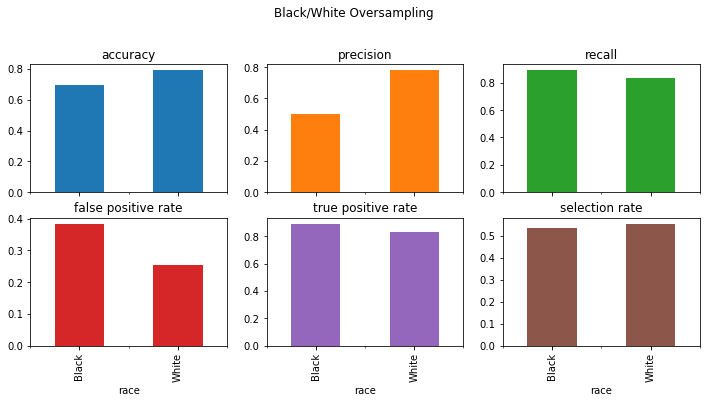

In [29]:
print('**OVERSAMPLING**')

bw_over_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Oversampling"
)

bw_over_results.by_group

**UNDERSAMPLING**


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Black,0.693654,0.502988,0.892226,0.395404,0.892226,0.549234
White,0.791646,0.780177,0.831149,0.250631,0.831149,0.550736


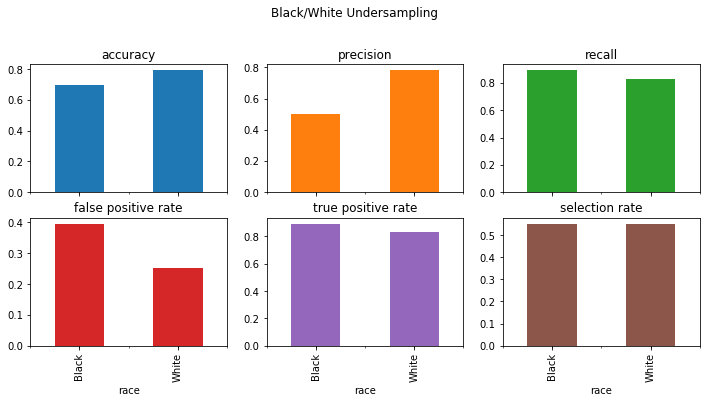

In [30]:
print('**UNDERSAMPLING**')

bw_under_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Undersampling"
)

bw_under_results.by_group

# Modelos de Classificação Diferentes (Random Forest e Gradient Boosting)
## Utilizando Raça como Atributo Sensível

In [31]:
#executando com outros modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#criando floresta aleatória
bw_random_forest = RandomForestClassifier(n_estimators=100,bootstrap=True, max_depth=3, max_features=9, max_leaf_nodes=8)

#criando aumento gradiente
bw_gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, max_features=9, max_leaf_nodes=8, loss='deviance', learning_rate=0.2, subsample=1)


In [32]:
#executando treino e previsão dos dois modelos

bw_random_forest_prev = run_classification(bw_random_forest,
                                           race_x_dummies,
                                           race_y,
                                           race_x['race'])

bw_gradient_boost_prev = run_classification(bw_gradient_boost,
                                           race_x_dummies,
                                           race_y,
                                           race_x['race'])

a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
a:\Downloads\Temporario\fairness-testing\env\lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series a

In [33]:
#calculando valores métricos para os dois novos classificadores

bw_random_forest_results = calculate_metrics(race_y, bw_random_forest_prev, race_x['race'])

bw_gradient_boost_results = calculate_metrics(race_y, bw_gradient_boost_prev, race_x['race'])

**RANDOM FOREST**



,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Black,0.891996,0.708333,0.180212,0.010197,0.180212,0.030736
White,0.786983,0.990258,0.162911,0.000546,0.162911,0.041784


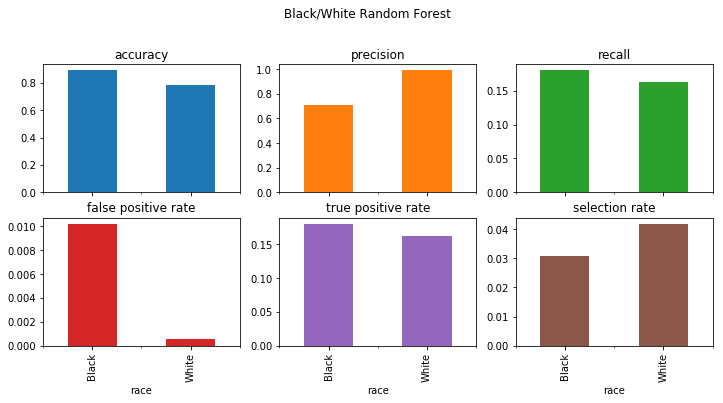

In [34]:
print('**RANDOM FOREST**\n')

bw_random_forest_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Random Forest"
)

bw_random_forest_results.by_group


**GRADIENT BOOSTING**



,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Black,0.902882,0.5676,0.823322,0.086186,0.823322,0.17524
White,0.861429,0.804909,0.599793,0.049494,0.599793,0.189263


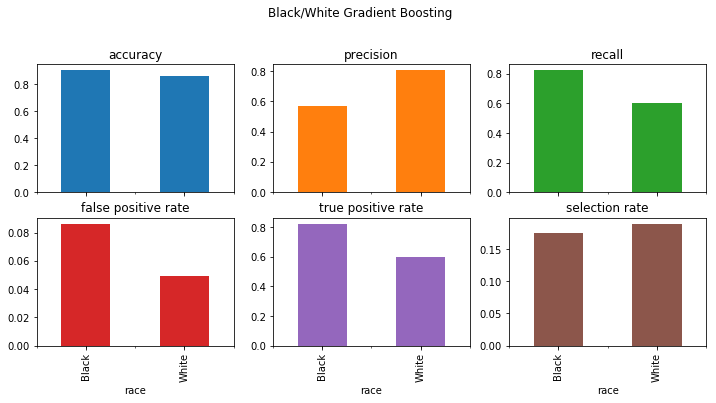

In [35]:
print('\n**GRADIENT BOOSTING**\n')

bw_gradient_boost_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Gradient Boosting"
)

bw_gradient_boost_results.by_group